# AE-410 GPS (Assignment-1 Fundamentals of GPS)
Rollno. 20D170022
Name - Lyric Khare

In [1]:
# Shri Ganeshaya Namah
# @author.lyrickhare

## Some important Relations / Properties
- $C_i(\eta-\tau)$ is the PRN code (similar to a vector/array with 1023 dimensions/elements) for $i-th$ satellite, delayed by $\tau$ chips
- $C_i(\eta) = C_i(\eta+1023)$ i.e. PRN codes are periodic with period = 1023 chips = 1 millisecond
- $\frac{C_i(\eta)\oplus C_j(\eta-\tau)}{1023} = 1$ {iff $i=j$ and $\tau = 0$, = 0 otherwise}
- $\oplus$ in the above point denotes correlation, i.e. element wise multiplication:

    - $C_i(\eta)\oplus C_j(\eta-\tau) = \sum_{r = 0}^{r = 1023}  C_i(\eta)[r]\cdot C_j(\eta-\tau)[r] $
    - $C_i(\eta)[r]$ is a scalar value having 0 or 1 value

## References / Resources
- Github repository having 32 GPS PRN codes https://github.com/danipascual/GNSS-matlab.git

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [3]:
# GPS PRN Extraction
codesFile = scipy.io.loadmat("randomData/codes_L1CA.mat")
codes = np.array(codesFile['codes_L1CA'])

In [4]:
# shape of codes array
print(codes.shape)

(1023, 32)


Proof of $\frac{C_i(\eta)\oplus C_j(\eta-\tau)}{1023} = 1$ {iff $i=j$ and $\tau = 0$, = 0 otherwise}


In [5]:
corrArr = np.zeros((2,2,1023))
for i in range(0,2):
    for k in range(0,2):
        for j in range(0,len(corrArr)):
            corrArr[i][k][j]=  np.correlate(codes[:,i],np.roll(codes[:,k],-j),'valid')

C:\Users\lyric\AppData\Local\Temp\ipykernel_20908\3946328126.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  corrArr[i][k][j]=  np.correlate(codes[:,i],np.roll(codes[:,k],-j),'valid')


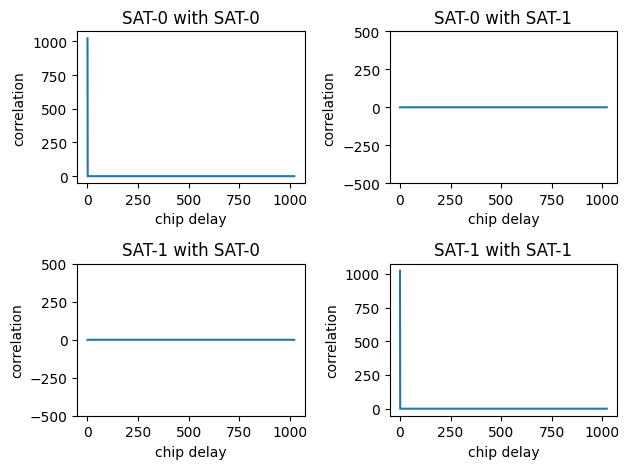

In [6]:
%matplotlib inline
plt.subplot(2,2,1)
plt.plot(corrArr[0,0,:])
plt.ylabel('correlation')
plt.xlabel('chip delay')
plt.title('SAT-0 with SAT-0')
plt.subplot(2,2,2)
plt.plot(corrArr[0,1,:])
plt.ylabel('correlation')
plt.xlabel('chip delay')
plt.yticks(np.linspace(-500,500,5))
plt.title('SAT-0 with SAT-1')
plt.subplot(2,2,3)
plt.plot(corrArr[1,0,:])
plt.ylabel('correlation')
plt.xlabel('chip delay')
plt.yticks(np.linspace(-500,500,5))
plt.title('SAT-1 with SAT-0')
plt.subplot(2,2,4)
plt.plot(corrArr[1,1,:])
plt.ylabel('correlation')
plt.xlabel('chip delay')
plt.title('SAT-1 with SAT-1')

plt.tight_layout()

It is clear that the correlation is high only when there is 0 delay and same satellite PRN

### Q1
Write a MATLAB/Python/C/C++ program to compute circular autocorrelation of PRN 8 with a 
delayed PRN code by 200 chips and plot the results

### Soln:
 $\frac{C_8(\eta)\oplus C_8(\eta-200)}{1023}$

In [7]:
np.correlate(codes[:,8],np.roll(codes[:,8],-200),'valid')/1023

array([-0.00097752])

maximum value comes when two overlap fully, which is at 200


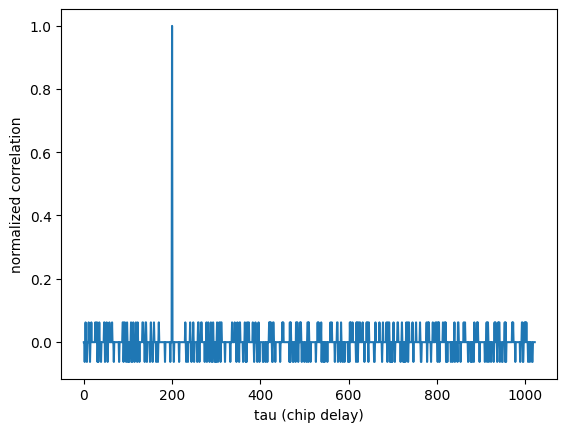

In [8]:
# plot for different delays of main PRN
tempval = [np.correlate(np.roll(codes[:,8],-i),np.roll(codes[:,8],-200),'valid')/1023 for i in range(0,1023)]
plt.plot(tempval)
plt.xlabel("tau (chip delay)")
plt.ylabel("normalized correlation")
print("maximum value comes when two overlap fully, which is at " + str(np.argmax(tempval)))

### Q2
Write a MATLAB/ Python/C/C++ program to compute circular cross correlation of PRN 8 with a 
delayed copy of a PRN 16 by 900 chips and plot the results.

### Soln:
 $\frac{C_8(\eta)\oplus C_16(\eta-900)}{1023}$

In [9]:
np.correlate(codes[:,8],np.roll(codes[:,16],-900),'valid')/1023

array([-0.00097752])

maximum value never comes as both PRN are different, can be clearly seen as max(abs(correlation)) = [0.06353861]


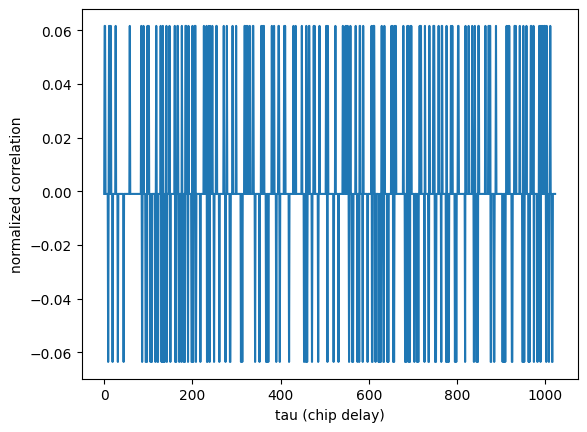

In [10]:
# plot for different delays in main PRN
tempval = [np.correlate(np.roll(codes[:,8],-i),np.roll(codes[:,16],-900),'valid')/1023 for i in range(0,1023)]
plt.plot(tempval)
plt.xlabel("tau (chip delay)")
plt.ylabel("normalized correlation")
print("maximum value never comes as both PRN are different, can be clearly seen as max(abs(correlation)) = "+str(max(np.abs(tempval))))

### Q3
Write a MATLAB/Python/C/C++ program to compute autocorrelation of PRN 8 with a delayed 
PRN code by -1, 0, and 1 chip, respectively and plot the correlation with the delay chip. 

### Soln:
- $\frac{C_8(\eta) \oplus C_{16}(\eta+1)}{1023}$
- $\frac{C_8(\eta) \oplus C_{16}(\eta-0)}{1023}$
- $\frac{C_8(\eta) \oplus C_{16}(\eta-1)}{1023}$

Text(0, 0.5, 'normalized correlation')

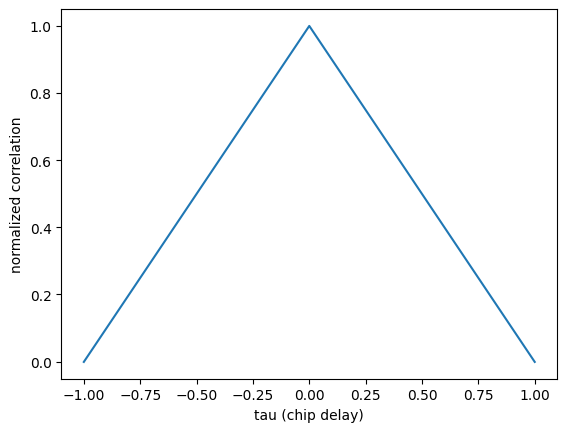

In [11]:
cor = np.zeros((3,1))
cor[0] = np.correlate(codes[:,8],np.roll(codes[:,8],1),'valid')/1023
cor[1] = np.correlate(codes[:,8],np.roll(codes[:,8],0),'valid')/1023
cor[2] = np.correlate(codes[:,8],np.roll(codes[:,8],-1),'valid')/1023
plt.plot(np.array([-1,0,1]),cor)
plt.xlabel("tau (chip delay)")
plt.ylabel("normalized correlation")

### Q4
Write a MATLAB/ Python/C/C++ program to compute circular autocorrelation of PRN 8 with a 
noisy PRN code delayed by 200 chips and plot the results. Assume the noise is white Gaussian additive and 
generated with mean zero and standard deviation of 4.

### Soln:
- $PRN_{noisy} = (C_8(\eta-200) + N(0,4))\% 2$
- $C_8(\eta)\oplus PRN_{noisy}$

In [12]:
noisy = (np.array(codes[:,8])+ np.round(np.random.normal(0,4,1023)))%2
np.correlate(codes[:,8],np.roll(noisy,-200),'valid')/1023


array([-0.03812317])

here we can see that due to noise there is no clear maximum value visible


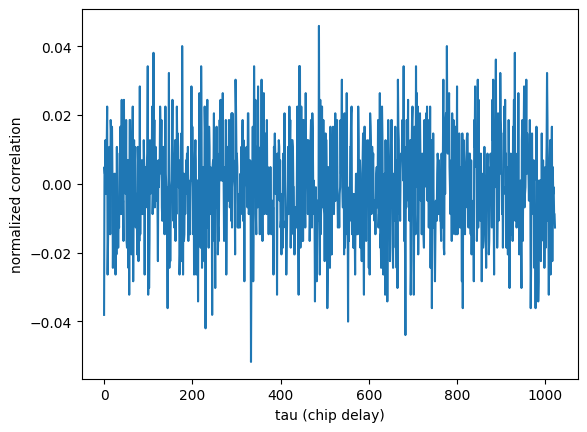

In [13]:
# plot for different delays of main PRN
tempval = [np.correlate(np.roll(codes[:,8],-i),np.roll(noisy,-200),'valid')/1023 for i in range(0,1023)]
plt.plot(tempval)
plt.xlabel("tau (chip delay)")
plt.ylabel("normalized correlation")
print("here we can see that due to noise there is no clear maximum value visible")

### Q5
Write a MATLAB/ Python/C/C++ program to implement serial search/parallel code phase search 
acquisition algorithm. Identify the satellites (PRN IDs), carrier frequency, and code phase using the
acquisition algorithm in the data file provided in the Google drive

### Sol.
- we know the signal received at the antenna is:


$s(t) = \sqrt{2P}D(t-\tau)C(t-\tau)cos((w_L+w_D)t+\theta)$
where : 
    - P is power
    - $\tau$ is delay ($\tau = \tau_{int} + \tau_{frac}$)
    - $w_L$ is L-5 band frequency and $w_D$ is doppler frequency

- After RF front-end processing we get:

$ I = \sqrt{2P_1}D(t-\tau)C(t-\tau)cos( (w_D)t+\theta)$


$ Q = \sqrt{2P_1}D(t-\tau)C(t-\tau)sin( (w_D)t+\theta)$

where:
    - I is Inphase samples
    - Q is Quadrature samples

**Note** : slight abuse of notation is used as we defined C for discrete values while here we are considering it as continous, but this discrepancy will be resolved in program as we have input data as discrete samples

#### Now,
for serial search we need to get 3 parameters 

- $i$ the satellite number
- $\tau_{frac} \in [0,1022]$
- $w_D \in [-20k Hz : 500 Hz : 20k Hz]$

#### Steps

- Firstly, we will multiply $cos(  \hat w_Dt)$ and $sin(  \hat w_Dt)$ to I and Q respectively, and then pass it through a low pass filter

- Then, we will multiply $C_i(t-\hat\tau)$ to both I and Q

- We will get:

$ \hat I = \sqrt{2P_1}D(t-\tau)C(t-\tau)cos( (w_D-\hat w_D)t+\theta)\oplus C_i(t-\hat\tau)$

$ \hat Q = \sqrt{2P_1}D(t-\tau)C(t-\tau)sin( (w_D-\hat w_D)t+\theta)\oplus C_i(t-\hat\tau)$

when $w_D = \hat w_D$:

$ \hat I_{w_D = \hat w_D} = \sqrt{2P_1}D(t-\tau)C(t-\tau)cos(\theta)\oplus C_i(t-\hat\tau)$

$ \hat Q_{w_D = \hat w_D} = \sqrt{2P_1}D(t-\tau)C(t-\tau)sin(\theta)\oplus C_i(t-\hat\tau)$

Finally, we can take norm of [$\hat I$,$\hat Q$] to get final  correlation, that we wish to get maximised

$corr = \sqrt{\hat I^2+\hat Q^2}$

In [14]:
# Assumptions: 
#   - Sampling frequency is Fs which is a multiple of 1.023 MHz
#   - Fs = n*1.023 MHz

def modPRN(PRN,n,tau):
    """
    function to get modified PRN for some sampling frequency & delay
    Inputs: 
        - PRN is the PRN code for single satellite with 1023 length
        - n = SamplingFrequency/1.023e6 
    Output:
        - PRN code for 1 millisecond with length = 1023*n
        - This PRN code is delayed by tau chips
    """

    return np.roll(np.repeat(PRN,n),-tau)

In [15]:
# Serial Search Function
wd = np.linspace(-20000,20000,41)
def serialSearch(I,Q,Fs,IRNSS_PRN_Codes,wD=wd):
    """
    Assumption for this serial search:
        - we are getting data from only 1 satellite
    Note:
        - Can improve this function by:
            - setting a threshold based on std dev of the correlationn
            - using clustering to differentiate high values from low value
    Inputs:
        - I = Inphase component for 1 millisecond i.e. length = 1023*Fs/1.023e6
        - Q = Quadrature component for 1 millisecond i.e. length = Fs*1e-3
        - Fs = sampling frequency in Hz
        - IRNSS_PRN_Codes = 7 PRN codes each of 1023 length; i.e (1023 x 7)
        - wD =  array of possible doppler frequencies
    Outputs:
        - satNum = satellite number = {0,1,2,3,4,5,6}
        - taustar = codePhase (fractional part)
        - wdstar = doppler frequency
    """
    n = Fs/1.023e6
    totalSatNum = IRNSS_PRN_Codes.shape[1] # 7 for IRNSS
    tau = np.linspace(0,1023*n,1023*n)
    correlation = np.zeros((totalSatNum,len(wD),len(tau)))
    t = np.linspace(0,1,1023*n)*1e-3

    for i in range(0,totalSatNum):
        for j in range(0,len(wD)):
            for k in range(0,len(tau)):
                I_hat = I*np.cos(wD[j]*t)
                Q_hat = Q*np.sin(wD[j]*t)
                I_hat= np.correlate(I_hat,modPRN(IRNSS_PRN_Codes[:,i],n,tau),'valid')/1023
                Q_hat= np.correlate(Q_hat,modPRN(IRNSS_PRN_Codes[:,i],n,tau),'valid')/1023
                correlation[i,j,k] = np.sqrt(I_hat**2+Q_hat**2)
    satNum,wdstar,taustar = np.unravel_index(correlation.argmax(), correlation.shape)  
    return satNum,wdstar,taustar


## Question can't be solved further
There are some issues in the data .BIN files:

- 2 seconds file is for L1 band but IRNSS satellites operate on L5 and S band
- The data format is not clear because if we assume that each byte i.e. 8 bits contain 1 data point for each I and Q then the sampling frequency and data points are giving contradiction

In [16]:
with open('L1_DHRV.BIN', 'rb') as f:
    # Read the data into a NumPy array
    array = np.fromfile(f, dtype=np.uint8)

In [17]:
Fs = 23e6 # sampling frequency
t = 2 # time for which signal is received

In [18]:
totalSamples = Fs*t

In [19]:
nbytes = len(array) # no. of bytes

In [20]:
totalSamples/nbytes # this value should have been 1

4.010881696428571